# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. 

The columns `Channel` and `Region` refer to the following:

* `Channel`: 

    1. Horeca (Hotel/Restaurant/Cafe)

    2. Retail channel

* `Region`: 

    1. Lisnon

    2. Oporto

    3. Other

1. Data Import: Import the dataset into a statistical software tool such as Python or R.


In [1591]:
import pandas as pd
import numpy as np

df = pd.read_csv('Wholesale_Data.csv')
print('Shape of Data Frame:', df.shape)
df.head()


Shape of Data Frame: (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


2. Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.

In [1592]:
# Remove duplicates
df.drop_duplicates()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [1593]:
print('Shape of Data Frame after removing duplicates:', df.shape)

Shape of Data Frame after removing duplicates: (440, 8)


In [1594]:
# Check for unique values and value counts.
print('Value Counts:')
print(f"\nUnique values: {df['Channel'].nunique()}")
print(f"{df['Channel'].value_counts().sort_values(ascending=True, na_position='first')}")
print(f"\nUnique values: {df['Region'].nunique()}")
print(f"{df['Region'].value_counts().sort_values(ascending=True, na_position='first')}")
print(f"\nUnique values: {df['Fresh'].nunique()}")
print(f"{df['Fresh'].value_counts().sort_values(ascending=True, na_position='first')}")
print(f"\nUnique values: {df['Milk'].nunique()}")
print(f"{df['Milk'].value_counts().sort_values(ascending=True, na_position='first')}")
print(f"\nUnique values: {df['Grocery'].nunique()}")
print(f"{df['Grocery'].value_counts().sort_values(ascending=True, na_position='first')}")
print(f"\nUnique values: {df['Frozen'].nunique()}")
print(f"{df['Frozen'].value_counts().sort_values(ascending=True, na_position='first')}")
print(f"\nUnique values: {df['Detergents_Paper'].nunique()}")
print(f"{df['Detergents_Paper'].value_counts().sort_values(ascending=True, na_position='first')}")
print(f"\nUnique values: {df['Delicassen'].nunique()}")
print(f"{df['Delicassen'].value_counts().sort_values(ascending=True, na_position='first')}")


Value Counts:

Unique values: 2
Channel
2    142
1    298
Name: count, dtype: int64

Unique values: 3
Region
2     47
1     77
3    316
Name: count, dtype: int64

Unique values: 433
Fresh
4627     1
7579     1
5963     1
6006     1
13146    1
        ..
514      2
8040     2
18044    2
3        2
9670     2
Name: count, Length: 433, dtype: int64

Unique values: 421
Milk
607      1
11093    1
5403     1
1124     1
12319    1
        ..
1196     2
899      2
1012     2
3880     2
3045     2
Name: count, Length: 421, dtype: int64

Unique values: 430
Grocery
218      1
5126     1
6975     1
9426     1
6192     1
        ..
10391    2
2405     2
1493     2
2406     2
1664     2
Name: count, Length: 430, dtype: int64

Unique values: 426
Frozen
2601    1
1669    1
1159    1
4400    1
1420    1
       ..
133     2
824     2
848     2
402     2
2540    2
Name: count, Length: 426, dtype: int64

Unique values: 417
Detergents_Paper
514     1
7425    1
5977    1
549     1
3881    1
       ..
70    

In [1595]:
# check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64


In [1596]:
# display all columns and their data types
print("Columns and their data types:")
print(df.dtypes)

Columns and their data types:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [1597]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Description of the Wholesale data

1. **Channel** - only 2 different Channels. 
2. **Region** - there are 3 different Regions. 
3. **Fresh** - the mean differs a lot from the 50% quartile, meaning that maybe there is a very large variability between the minimum and maximum values. Potential outliers in this column. There is a really big Std.(~12,647). 
4. **Milk** - the same as above, the average is much bigger than the 50% percentile, and the std. too high. Potential outliers.
5. **Grocery** -  same as `Milk` and `Fresh`.
6. **Frozen** - the mean (3071.93) is almost twice as much as the 2nd quartile (median), meaning that the maximum data points are making the mean too high.
7. **Detergents_Paper** - the minimum data point(3) and the maximum data point (40,827) shows a wide variety in the dataset.
8. **Delicassen** - same as `Detergents_Paper`  

### Conclusion for the description of the Wholesale data

1. **Skewness of Data**:
   - The large difference between the mean and median (50th percentile) indicates that the data is positively skewed, meaning that there are a few very high values (outliers) pulling the mean upwards.
   - This can be observed in columns like `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, and `Delicatessen`.

2. **Dispersion of Data**:
   - The standard deviation (std) values are quite large, particularly for `Fresh`, `Milk`, `Grocery`, and `Frozen` categories. This indicates high variability in the data (values are spread out over a wide range).

3. **Distribution Insights**:
   - The range (difference between max and min) is quite large for `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, and `Delicatessen`, showing that some customers have extremely high values in these categories.
   - For example, the `Fresh` category ranges from 3 to 112,151, showing the presence of extreme outliers.

4. **Interquartile Range (IQR)**:
   - The IQR (75% - 25%) for each category is substantial. For example, for `Fresh`, the IQR is 16933.75 - 3127.75 = 13,806. This further indicates the wide spread of the data.
   - The high IQR values suggest that the data is not just influenced by a few outliers but has a generally broad distribution.

5. **Potential Outliers**:
   - Values at the max end are potential outliers. For instance, the `Fresh` category has a max value of 112,151 while the 75th percentile is only 16,933.75, suggesting that there are some extremely high outliers.
   - Similar observations can be made for other columns.

6. **Comparison Across Categories**:
   - Some categories like `Detergents_Paper` and `Delicatessen` have relatively smaller means and medians compared to others like `Fresh` and `Grocery`, suggesting that these categories might be less significant in terms of quantity or value for the business.

7. **Channel and Region Distribution**:
   - The Channel and Region columns seem to have fewer unique values, indicating categorical data. Channel has values either 1 or 2, and Region has values 1, 2, or 3. 
   - The mean of Channel (1.322727) suggests that more data points fall into Channel 1 than Channel 2.
   - Similarly, the mean of Region (2.543182) suggests that more data points fall into Region 3 compared to Region 1 or 2.


## Visualization

In [1598]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distribution of a specified column
def plot_distribution(ax, df, column):
    if column in df.columns:
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        print(f"Column {column} not found in DataFrame")

# Function to plot scatterplot for a specified feature against another feature with hue
def plot_scatterplot(ax, df, x_feature, y_feature, hue_feature):
    if x_feature in df.columns and y_feature in df.columns and hue_feature in df.columns:
        sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df[hue_feature], ax=ax)
        ax.set_title(f'{x_feature} vs {y_feature} colored by {hue_feature}')
        ax.set_xlabel(x_feature)
        ax.set_ylabel(y_feature)
    else:
        missing_features = [feature for feature in [x_feature, y_feature, hue_feature] if feature not in df.columns]
        print(f"Feature(s) {', '.join(missing_features)} not found in DataFrame")

# Function to create a boxplot for a specified column
def plot_boxplot(ax, df, column):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

# Function to create a single output with subplots
def create_combined_plots(df, dist_column, scatter_x_feature, scatter_y_feature, scatter_hue_feature, box_column, filename='Plots/combined_plot.png'):
    fig, axs = plt.subplots(3, 1, figsize=(10, 6))

    plot_distribution(axs[0], df, dist_column)
    plot_scatterplot(axs[1], df, scatter_x_feature, scatter_y_feature, scatter_hue_feature)
    plot_boxplot(axs[2], df, box_column)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Example usage
#create_combined_plots(df, 'column_name_for_distribution', 'x_feature_name_for_scatter', 'description.sold_price', 'hue_feature_name_for_scatter', 'column_name_for_boxplot')



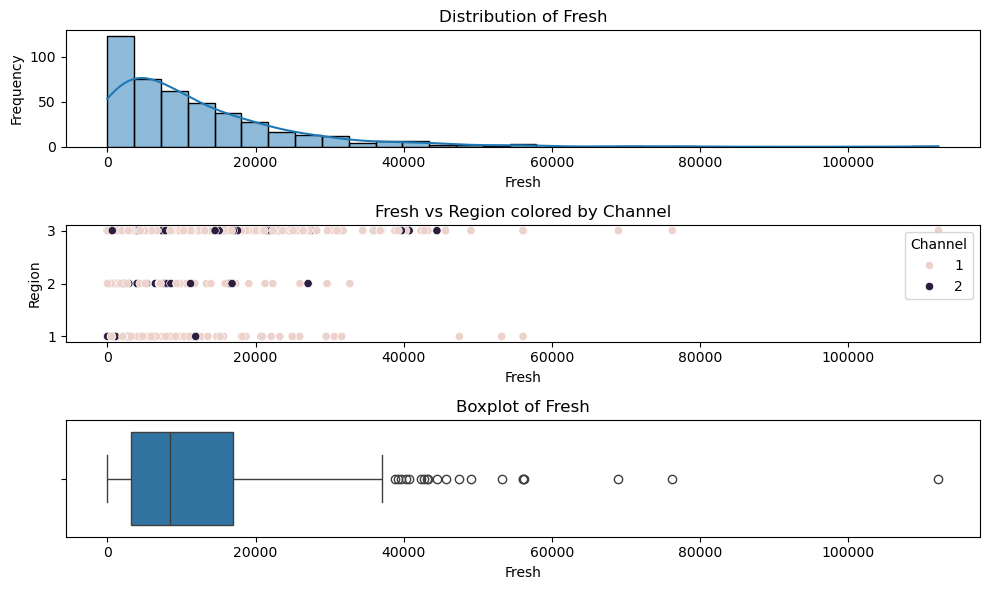

In [1599]:
create_combined_plots(df, 'Fresh', 'Fresh', 'Region', 'Channel', 'Fresh', 'Plots/Fresh vs Region vs Channel Combined with outliers.png')

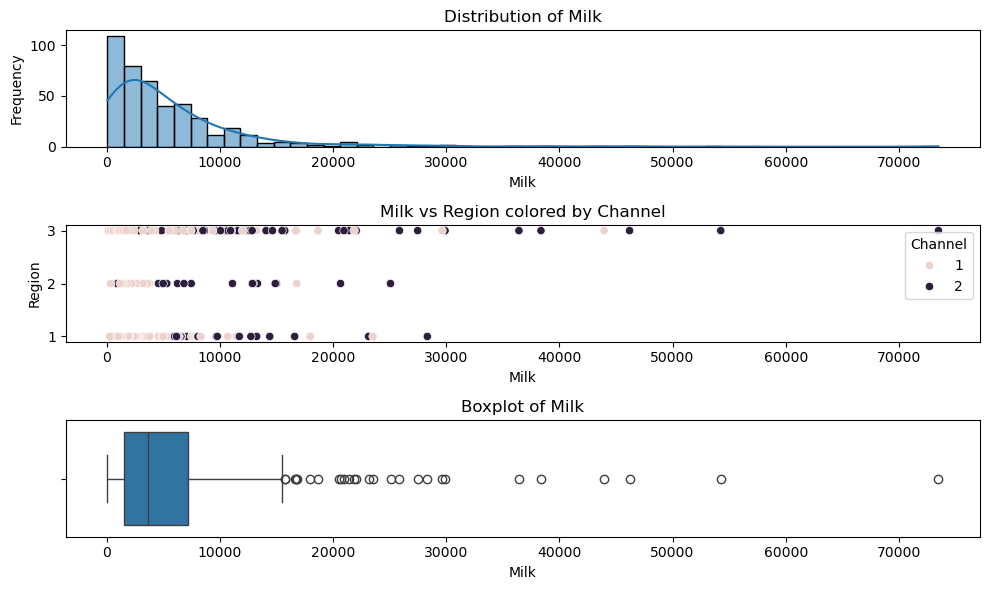

In [1600]:
create_combined_plots(df, 'Milk', 'Milk', 'Region', 'Channel', 'Milk', 'Plots/Milk vs Region vs Channel Combined with outliers.png')

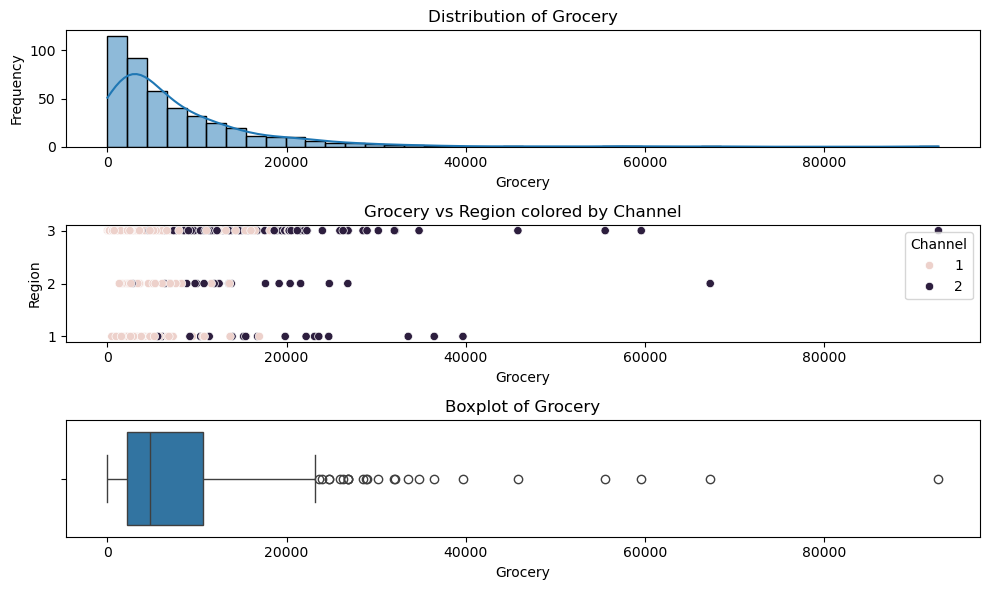

In [1601]:
create_combined_plots(df, 'Grocery', 'Grocery', 'Region', 'Channel', 'Grocery', 'Plots/Grocery vs Region vs Channel Combined with outliers.png')

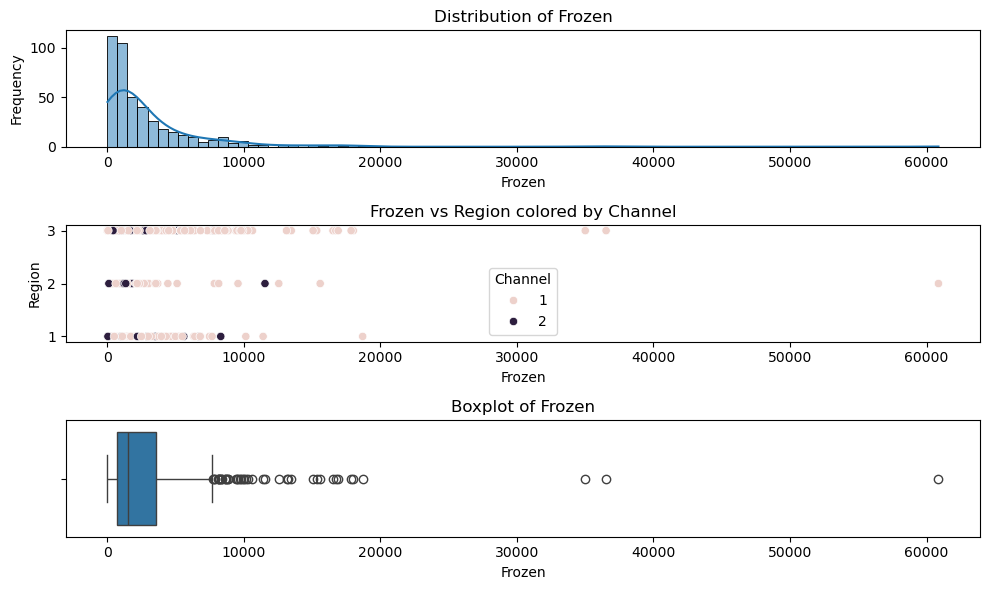

In [1602]:
create_combined_plots(df, 'Frozen', 'Frozen', 'Region', 'Channel', 'Frozen', 'Plots/Frozen vs Region vs Channel Combined with outliers.png')

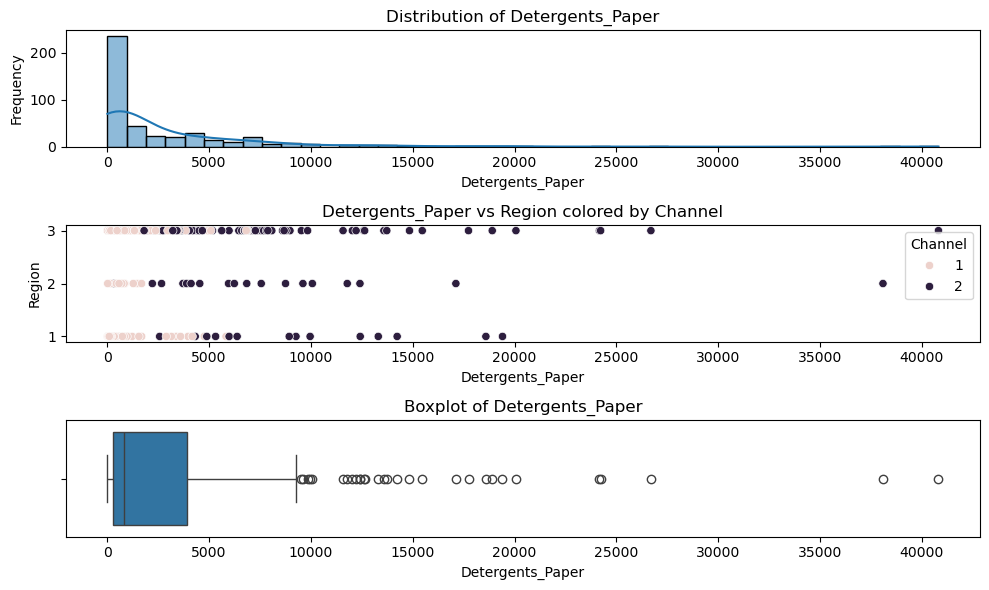

In [1603]:
create_combined_plots(df, 'Detergents_Paper', 'Detergents_Paper', 'Region', 'Channel', 'Detergents_Paper', 'Plots/Detergents_Paper vs Region vs Channel Combined with outliers.png')

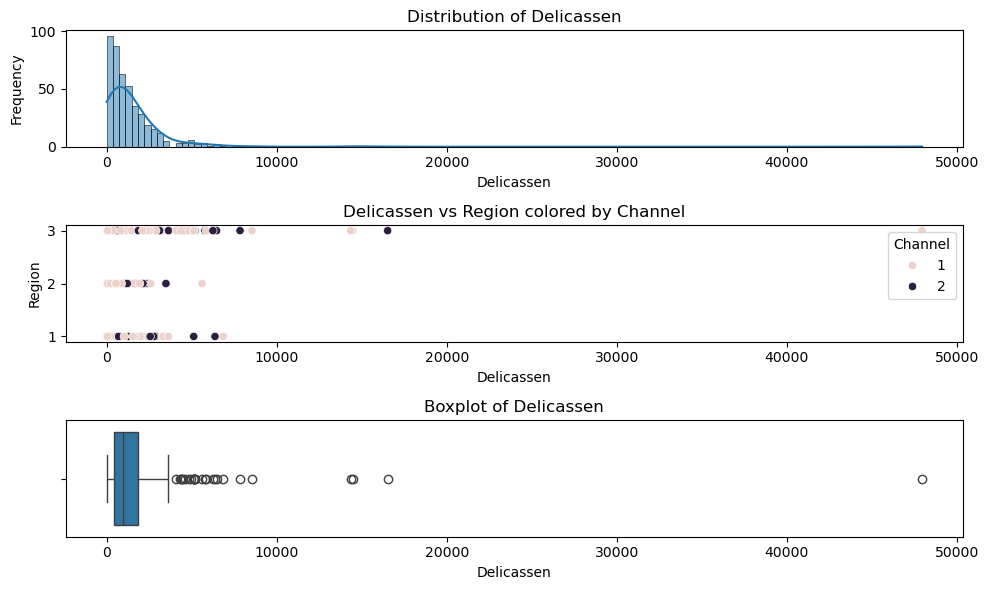

In [1604]:
create_combined_plots(df, 'Delicassen', 'Delicassen', 'Region', 'Channel', 'Delicassen', 'Plots/Delicassen vs Region vs Channel Combined with outliers.png')

In [1605]:
# Function to plot scatterplot for a specified feature against another feature with hue
def plot_scatterplot_ind(df, x_feature, y_feature, hue_feature, filename='Plots/scatterplot.png'):
    if x_feature in df.columns and y_feature in df.columns and hue_feature in df.columns:
        plt.figure(figsize=(5, 3))
        sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df[hue_feature])
        plt.title(f'{x_feature} vs {y_feature} colored by {hue_feature}')
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plt.tight_layout()
        plt.savefig(filename)
        plt.show()
    else:
        missing_features = [feature for feature in [x_feature, y_feature, hue_feature] if feature not in df.columns]
        print(f"Feature(s) {', '.join(missing_features)} not found in DataFrame")



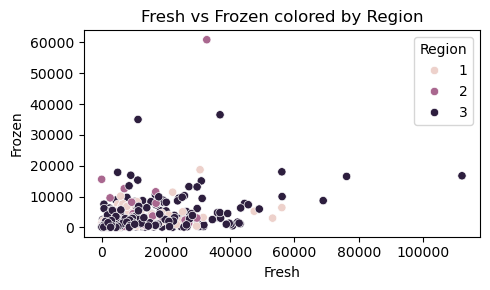

In [1606]:
plot_scatterplot_ind(df, 'Fresh', 'Frozen', 'Region', 'Plots/Fresh vs Frozen Scatter with ouliers.png')

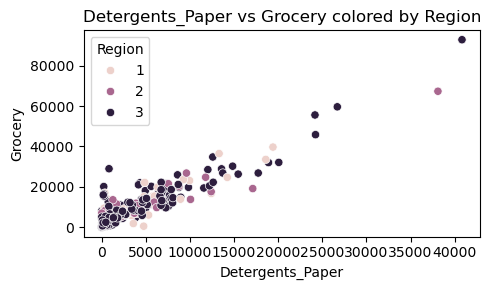

In [1607]:
plot_scatterplot_ind(df, 'Detergents_Paper', 'Grocery', 'Region', 'Plots/Grocery vs Detergents_Paper Scatter with ouliers.png')

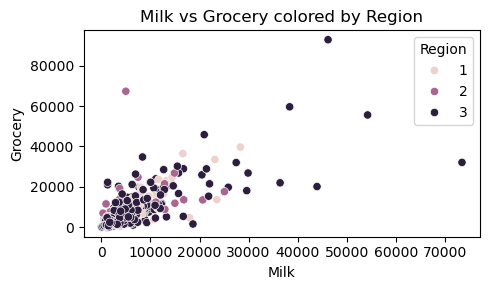

In [1608]:
plot_scatterplot_ind(df, 'Milk', 'Grocery', 'Region', 'Plots/Grocery vs Milk Scatter with ouliers.png')

## Cap Outliers in the dataset

### - Choosing the lower and upper limits to be at 1% and 99%, respectively. At first, 5% and 95% was applied, but outliers were still observed with the Boxplots. 

In [1609]:
# function to cap outliers at a specified percentile
def cap_outliers(df, cols, lower_percentile=0.01, upper_percentile=0.99):  #Changes to 0.01 and 0.99, respectively
    for col in cols:
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# identify all numerical columns to cap outliers
numerical_cols_to_cap = df.columns

# cap outliers in these numerical columns
df = cap_outliers(df, numerical_cols_to_cap)

In [1610]:
# Double check what columns were capped.
numerical_cols_to_cap

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

### - Outliers were still present (observed in the Boxplots below), so we will remove the remaining outliers due to high skeweness of the data to the right. 

#### ***Feel free to comment out the code below to see the difference between the dataset with outliers and then without the outliers in the plots below.***

In [1611]:
def identify_outliers(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

def drop_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = drop_outliers(df, numerical_cols_to_cap)


In [1612]:
df_cleaned.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,1.270440,2.559748,9718.325094,3990.816981,5565.170126,1799.766824,1840.666509,984.234465
std,0.444887,0.770851,8199.927701,3258.673233,4621.325172,1612.540386,2206.554934,785.370282
min,1.000000,1.000000,28.460000,255.560000,259.820000,43.950000,9.390000,7.390000
25%,1.000000,2.000000,3044.000000,1329.500000,2001.500000,575.250000,228.750000,360.250000
50%,1.000000,3.000000,7801.500000,3045.000000,3815.500000,1194.500000,675.000000,746.000000
75%,2.000000,3.000000,14084.750000,6188.000000,8435.500000,2559.500000,3273.000000,1441.500000
max,2.000000,3.000000,37036.000000,15729.000000,20292.000000,6845.000000,8077.000000,3271.000000


In [1613]:
# Function to plot distribution of a specified column
def plot_distribution(ax, df, column):
    if column in df.columns:
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        print(f"Column {column} not found in DataFrame")

# Function to plot scatterplot for a specified feature against another feature with hue
def plot_scatterplot(ax, df, x_feature, y_feature, hue_feature):
    if x_feature in df.columns and y_feature in df.columns and hue_feature in df.columns:
        sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df[hue_feature], ax=ax)
        ax.set_title(f'{x_feature} vs {y_feature} colored by {hue_feature}')
        ax.set_xlabel(x_feature)
        ax.set_ylabel(y_feature)
    else:
        missing_features = [feature for feature in [x_feature, y_feature, hue_feature] if feature not in df.columns]
        print(f"Feature(s) {', '.join(missing_features)} not found in DataFrame")

# Function to create a boxplot for a specified column
def plot_boxplot(ax, df, column):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

# Function to create a single output with subplots
def create_combined_plots(df, dist_column, scatter_x_feature, scatter_y_feature, scatter_hue_feature, box_column, filename='Plots/combined_plot.png'):
    fig, axs = plt.subplots(3, 1, figsize=(8, 8))

    plot_distribution(axs[0], df, dist_column)
    plot_scatterplot(axs[1], df, scatter_x_feature, scatter_y_feature, scatter_hue_feature)
    plot_boxplot(axs[2], df, box_column)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

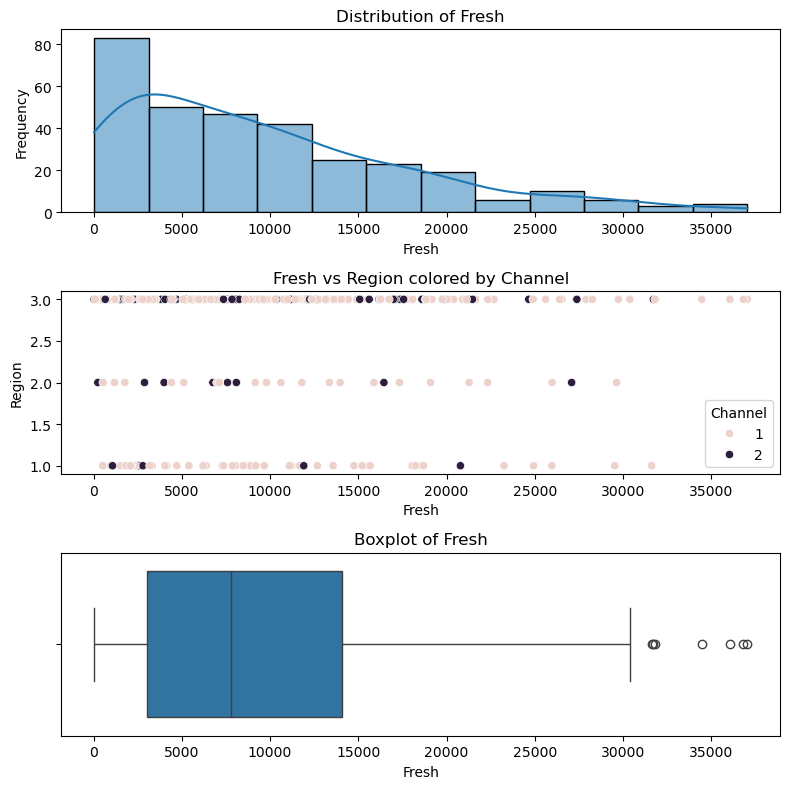

In [1614]:
create_combined_plots(df_cleaned, 'Fresh', 'Fresh', 'Region', 'Channel', 'Fresh', 'Plots/Fresh vs Region vs Channel Combined without outliers.png')

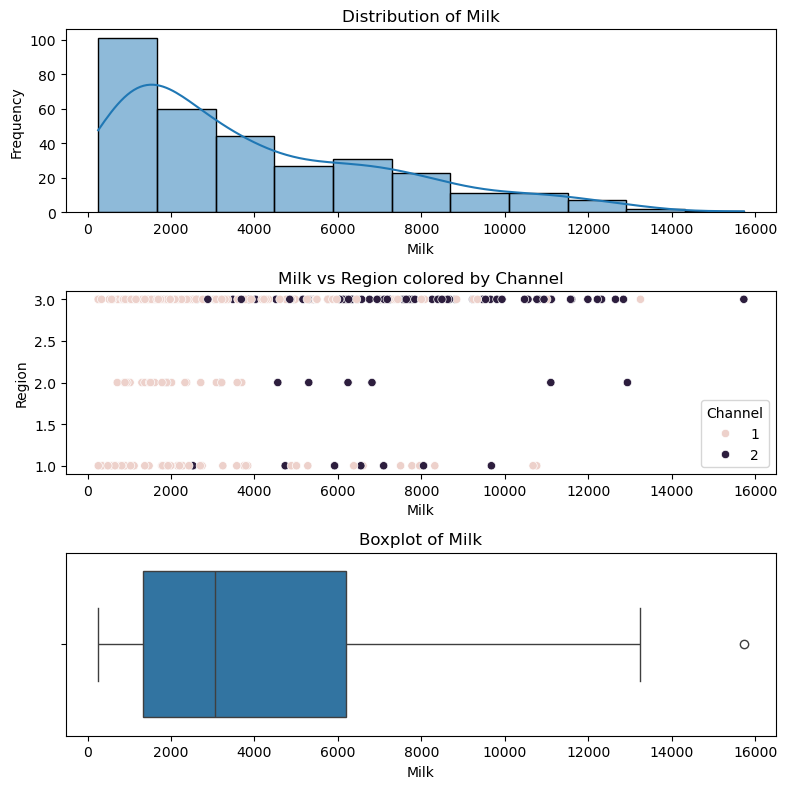

In [1615]:
create_combined_plots(df_cleaned, 'Milk', 'Milk', 'Region', 'Channel', 'Milk', 'Plots/Milk vs Region vs Channel Combined without outliers.png')

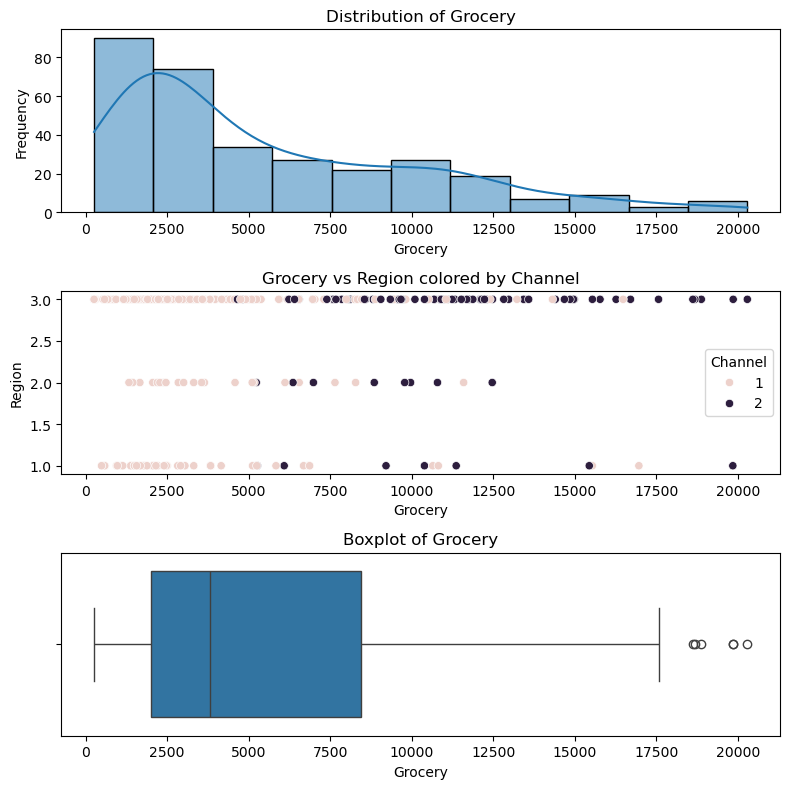

In [1616]:
create_combined_plots(df_cleaned, 'Grocery', 'Grocery', 'Region', 'Channel', 'Grocery', 'Plots/Grocery vs Region vs Channel Combined without outliers.png')

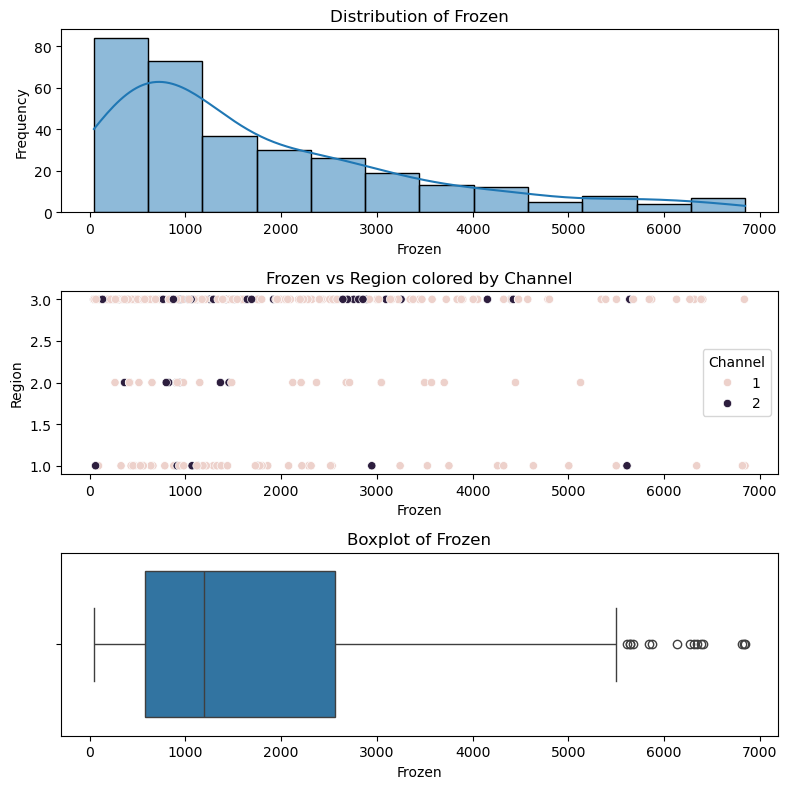

In [1617]:
create_combined_plots(df_cleaned, 'Frozen', 'Frozen', 'Region', 'Channel', 'Frozen', 'Plots/Frozen vs Region vs Channel Combined without outliers.png')

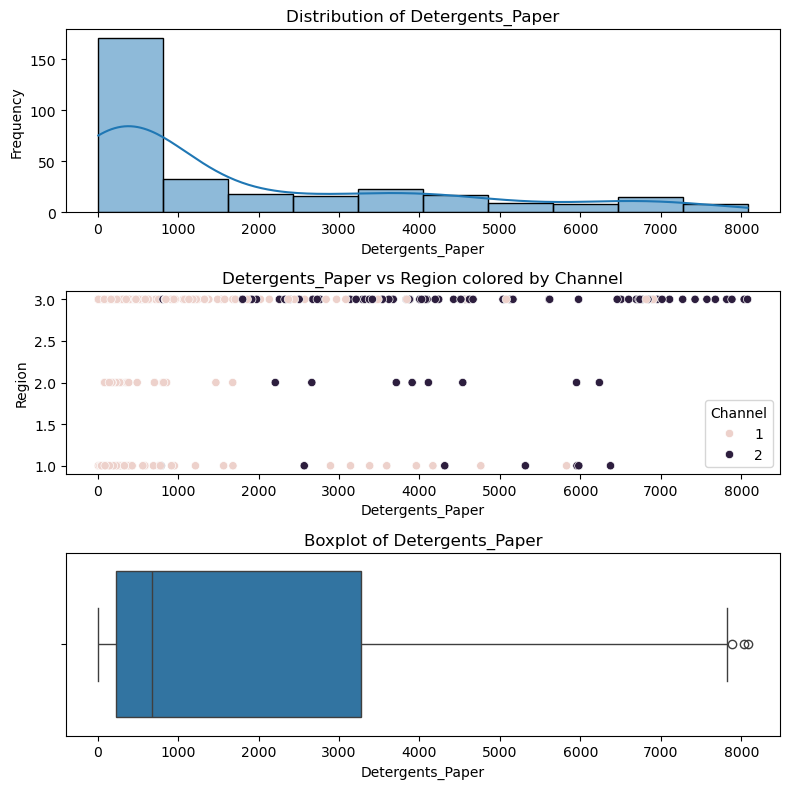

In [1618]:
create_combined_plots(df_cleaned, 'Detergents_Paper', 'Detergents_Paper', 'Region', 'Channel', 'Detergents_Paper', 'Plots/Detergents_Paper vs Region vs Channel Combined without outliers.png')

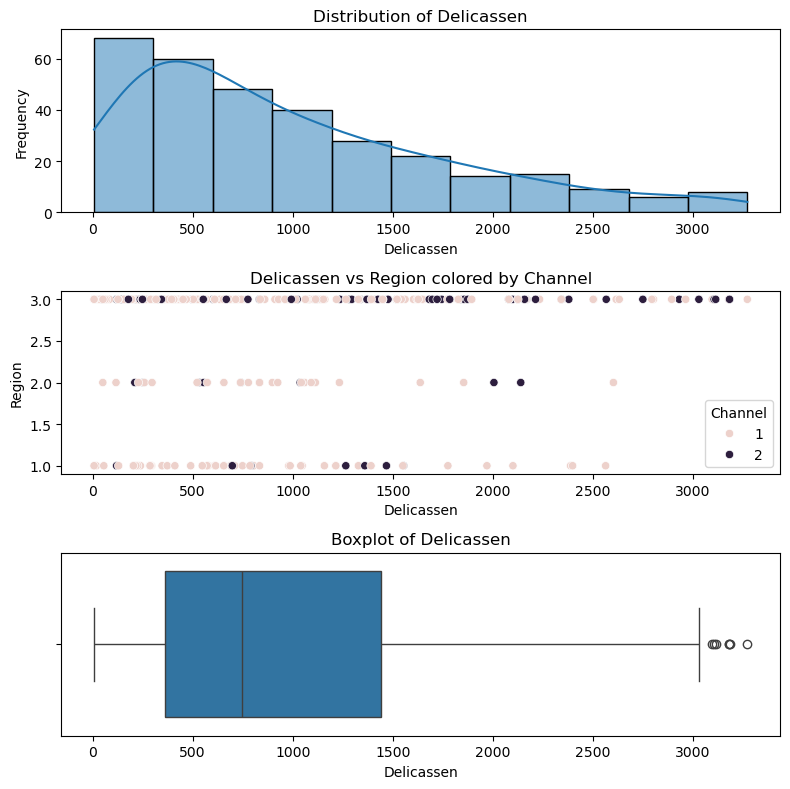

In [1619]:
create_combined_plots(df_cleaned, 'Delicassen', 'Delicassen', 'Region', 'Channel', 'Delicassen', 'Plots/Delicassen vs Region vs Channel Combined without outliers.png')

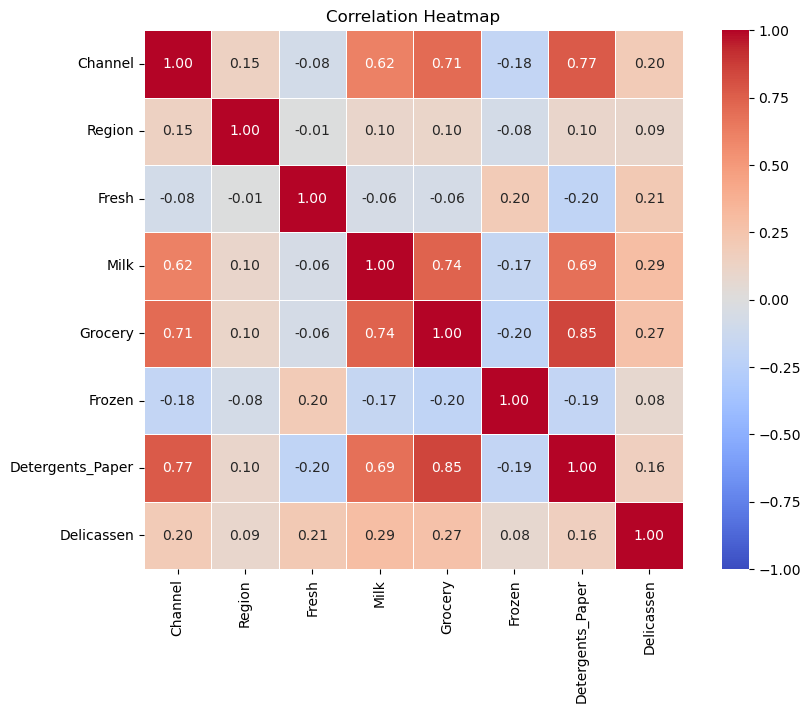

In [1620]:
def correlation_heatmap(df, features, filename='Plots/plot.png'):
    # Compute the correlation matrix
    corr = df[features].corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 7))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, fmt='.2f', cmap="coolwarm", square=True, linewidths=.5, vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.savefig(filename)
    plt.show()

selected_features = df.columns.tolist()
correlation_heatmap(df_cleaned, selected_features, 'Plots/Correlation Heatmap No Outliers.png')


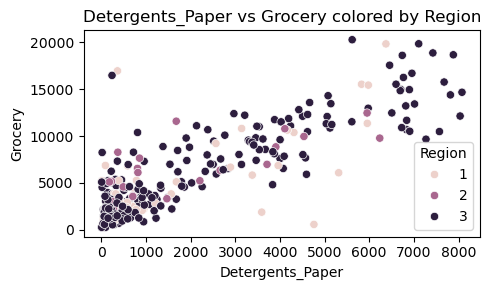

In [1621]:
plot_scatterplot_ind(df_cleaned, 'Detergents_Paper', 'Grocery', 'Region','Plots/Grocery vs Detergents_Paper Scatter without ouliers.png')

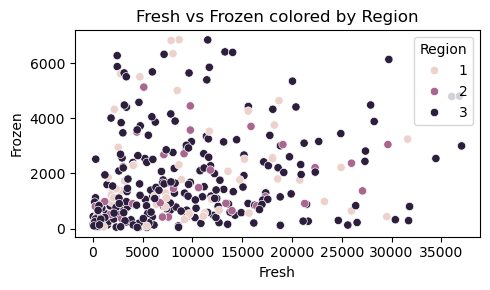

In [1622]:
plot_scatterplot_ind(df_cleaned, 'Fresh', 'Frozen', 'Region', 'Plots/Fresh vs Frozen Scatter without ouliers.png')

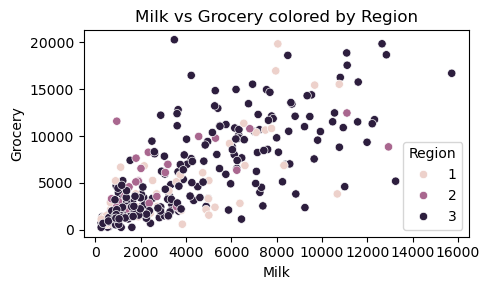

In [1623]:
plot_scatterplot_ind(df_cleaned, 'Milk', 'Grocery', 'Region', 'Plots/Milk vs Grocery Scatter without ouliers.png')

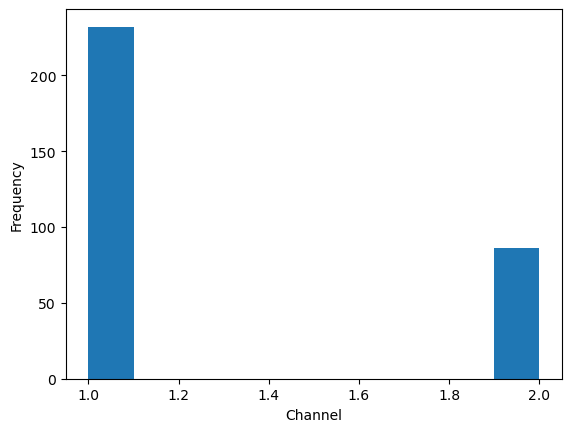

In [1624]:
plt.hist(df_cleaned['Channel'])
plt.ylabel('Frequency')
plt.xlabel('Channel')
plt.show()

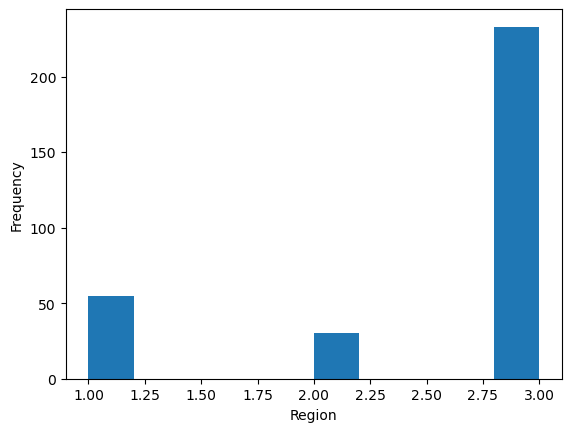

In [1625]:
plt.hist(df_cleaned['Region'])
plt.ylabel('Frequency')
plt.xlabel('Region')
plt.show()

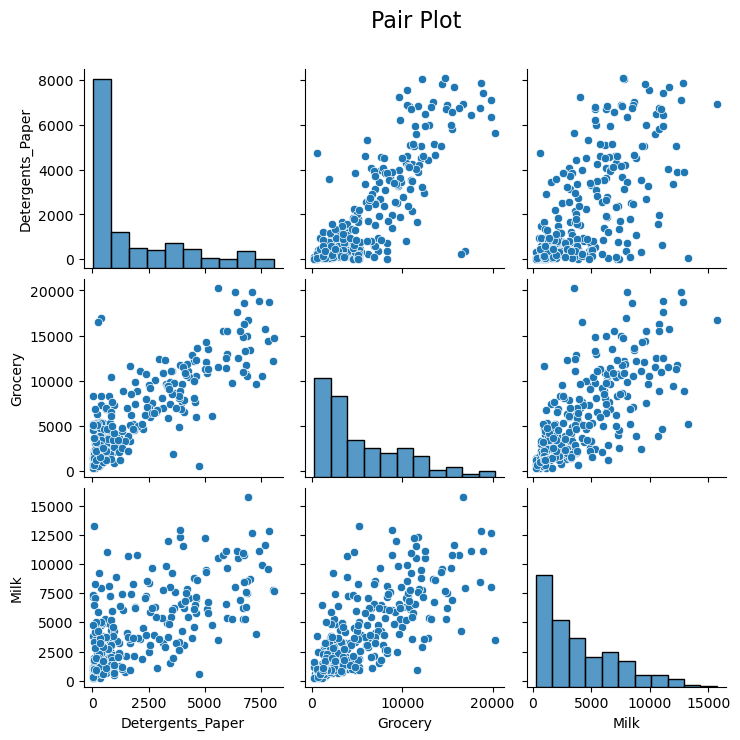

In [1626]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairplot for selected features
selected_features = ['Detergents_Paper', 'Grocery', 'Milk'] 
g = sns.pairplot(df_cleaned[selected_features])
g.fig.suptitle('Pair Plot', ha='left', fontsize=16)
g.fig.subplots_adjust(top=0.9)
plt.savefig('Plots/Pair Plot Detergents_Paper, Grocery, and Milk.png')

plt.show()

### Conclusion of Visualization after Capping Outliers
* Looking at the heatmap correlation plot and the scatterplots after capping the ouliers, we can see that there is a strong positive correlation between the `Detergents_Paper` and the `Grocery` columns. Also, a strong positive correlation between `Milk` and `Grocery`.

* Outliers were still present according to the boxplots after capping outliers at 1% and 99% lower and upper limits, respectively. In order to have a less skewed data, Log Trasnformation and Normalization will be necessary. `

## Log Transformation and Normalization

In [1627]:
# Function to log transform and normaliza data columns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def apply_transformations(df, columns_to_log_transform, columns_to_normalize):
    # Apply log transformation to each specified column
    for column in columns_to_log_transform:
        df[column] = np.log1p(df[column])

    # Normalization
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

    return df

# Select columns to be transformed
columns_to_log_transform = df_cleaned.drop(columns=['Channel', 'Region']).columns.to_list()
columns_to_normalize = df_cleaned.drop(columns=['Channel', 'Region']).columns.to_list()

# Apply transformations
df_transformed = apply_transformations(df_cleaned.copy(), columns_to_log_transform, columns_to_normalize)

In [1628]:
df_transformed.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,1.270440,2.559748,0.737754,0.574051,0.613663,0.638886,0.632840,0.725881
std,0.444887,0.770851,0.181394,0.229057,0.219224,0.220478,0.240004,0.189590
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.649917,0.399867,0.468127,0.507572,0.465160,0.630650
50%,1.000000,3.000000,0.781763,0.601128,0.616246,0.652767,0.627241,0.752419
75%,2.000000,3.000000,0.864536,0.773370,0.798417,0.804320,0.864306,0.862721
max,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1629]:
# Save Transformed Data Frame in CSV file
df_transformed.to_csv('Transformed Data.csv', index=False)

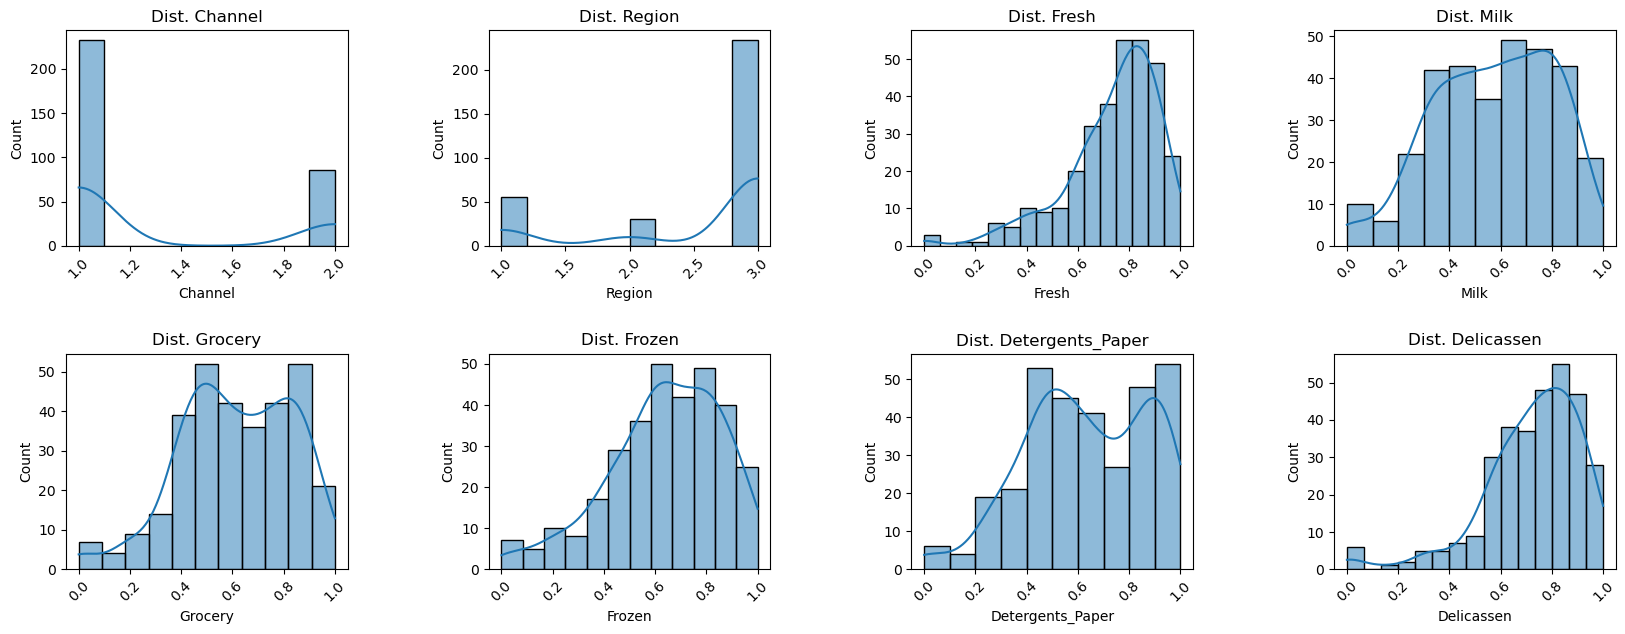

In [1630]:
# Function to plot the new distribution after transformation

def plot_transformed_distributions(df_transformed, filename= 'Plots/Transformed Distributions.png'):
    # Get the list of columns in the DataFrame
    columns = df_transformed.columns

    # Plot the distributions
    plt.figure(figsize=(20, 7))  # Adjust figure size for 1x6 grid

    for i, column in enumerate(columns, start=1):
        plt.subplot(2, 4, i)
        sns.histplot(df_transformed[column], kde=True)
        plt.title(f'Dist. {column}')
        plt.xticks(rotation=45)
    
    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.savefig(filename)
    
    plt.show()

# Example usage:
plot_transformed_distributions(df_transformed)


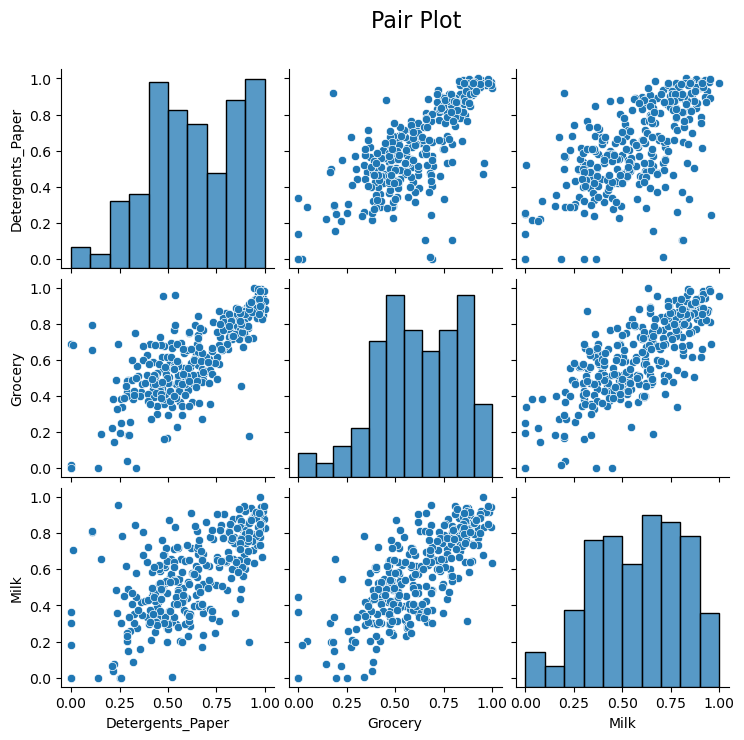

In [1631]:
# Plot pairplot for selected features after log and normalization transformations. 

selected_features = ['Detergents_Paper', 'Grocery', 'Milk'] 
g = sns.pairplot(df_transformed[selected_features])
g.fig.suptitle('Pair Plot', ha='left', fontsize=16)
g.fig.subplots_adjust(top=0.9)
plt.savefig('Plots/Pair Plots Detergents_Paper, Grocery and Milk after transformations.png')
plt.show()

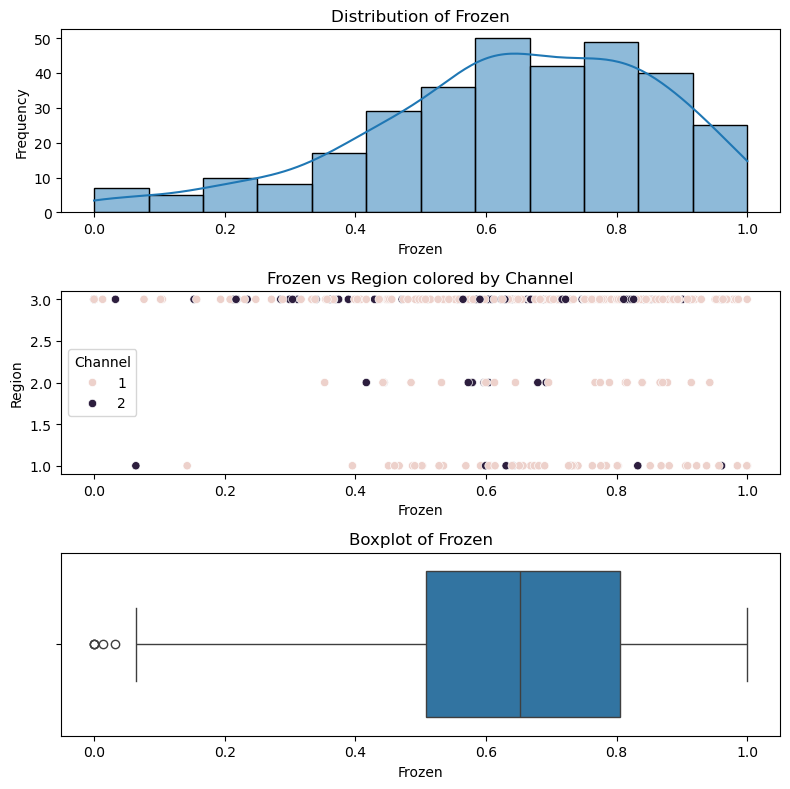

In [1632]:
create_combined_plots(df_transformed, 'Frozen', 'Frozen', 'Region', 'Channel', 'Frozen', 'Plots/Frozen vs Region vs Channel Combined Transformed.png')

### Conclusion for Log Transformation and Normalization
* Due to the data containing data points that were considered outliers, the data was skewed to the right, and Log Transformation and Normalization was applied to address this issue. 

* As seen in the plots above, the data is distributed more evenly and minimizes the number of extreme data points. 

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

## First KMeans Model


In [1633]:
from sklearn.cluster import KMeans

df_transformed = pd.read_csv('Transformed Data.csv')

X_transformed = df_transformed[['Region', 'Channel', 'Detergents_Paper', 'Grocery']]  

# Initialize the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the transformed data
kmeans.fit(X_transformed)

# Add the cluster labels back to the original DataFrame
df_transformed['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_centers = kmeans.cluster_centers_

# Analyze the clusters by looking at the average values of each attribute within each cluster
cluster_means = df_transformed.groupby('Cluster').mean()




### Scatteplots against `Region`

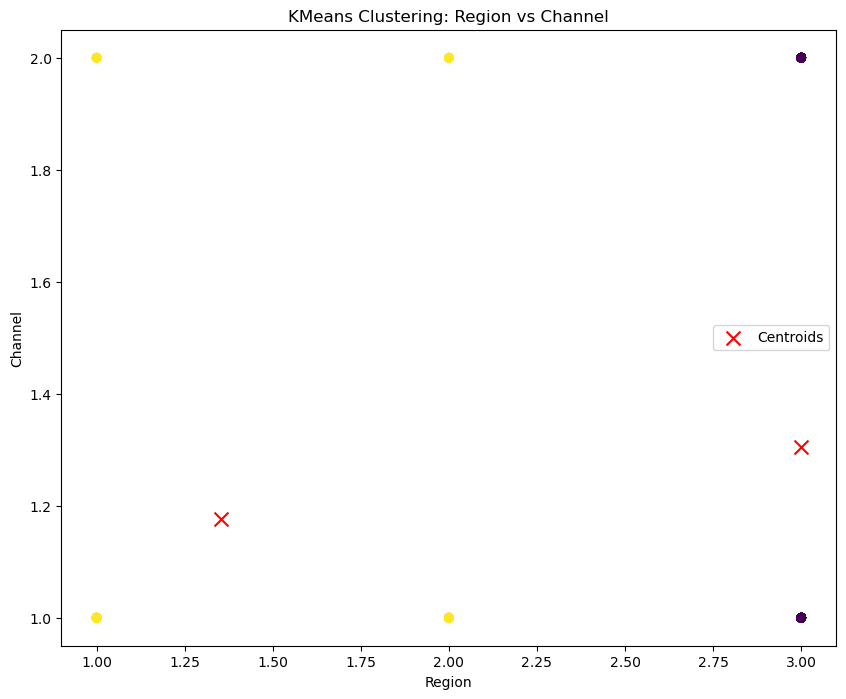

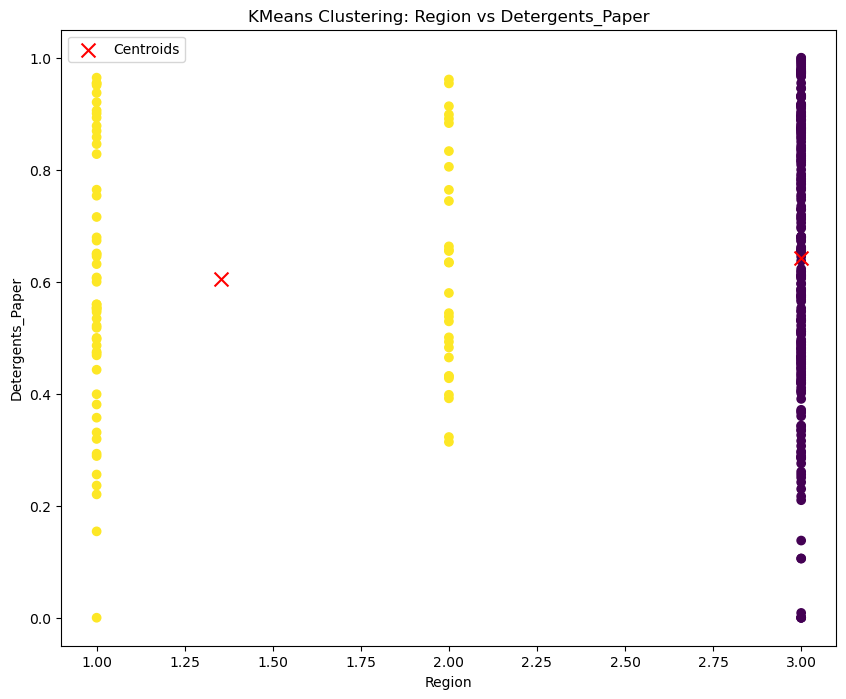

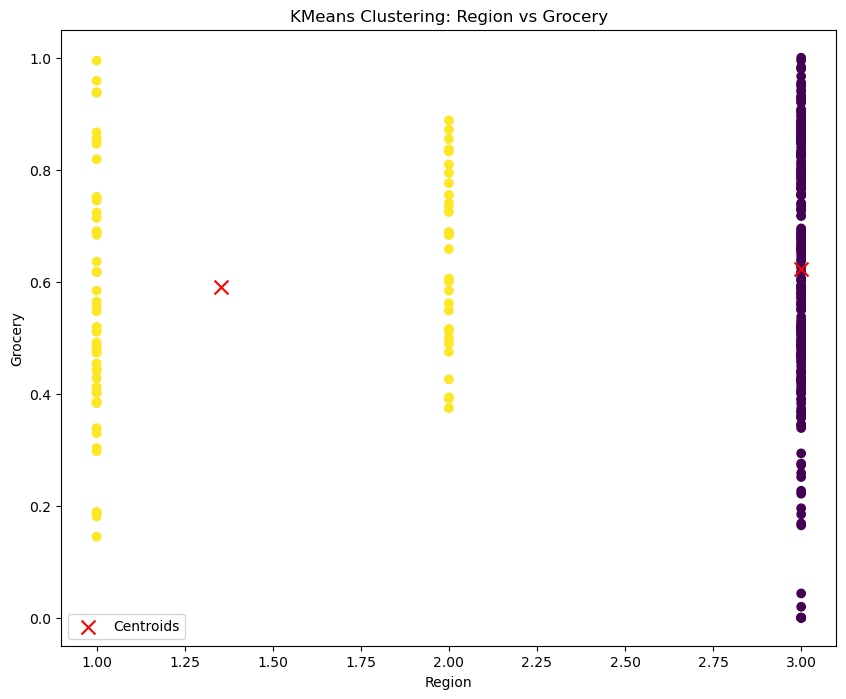

In [1634]:
import matplotlib.pyplot as plt

# Define the variables for the scatter plots
variables = ['Channel', 'Detergents_Paper', 'Grocery']

# Create scatter plots for each variable against 'Region'
for var in variables:
    plt.figure(figsize=(10, 8))
    plt.scatter(X_transformed['Region'], X_transformed[var], c=kmeans.labels_, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, variables.index(var) + 1], marker='x', c='r', s=100, label='Centroids')
    plt.xlabel('Region')
    plt.ylabel(var)
    plt.title(f'KMeans Clustering: Region vs {var}')
    plt.legend()
    plt.savefig('Plots/Region vs {var} KMeans Scatterplot')

    plt.show()


### Scatterplot againt `Channel`

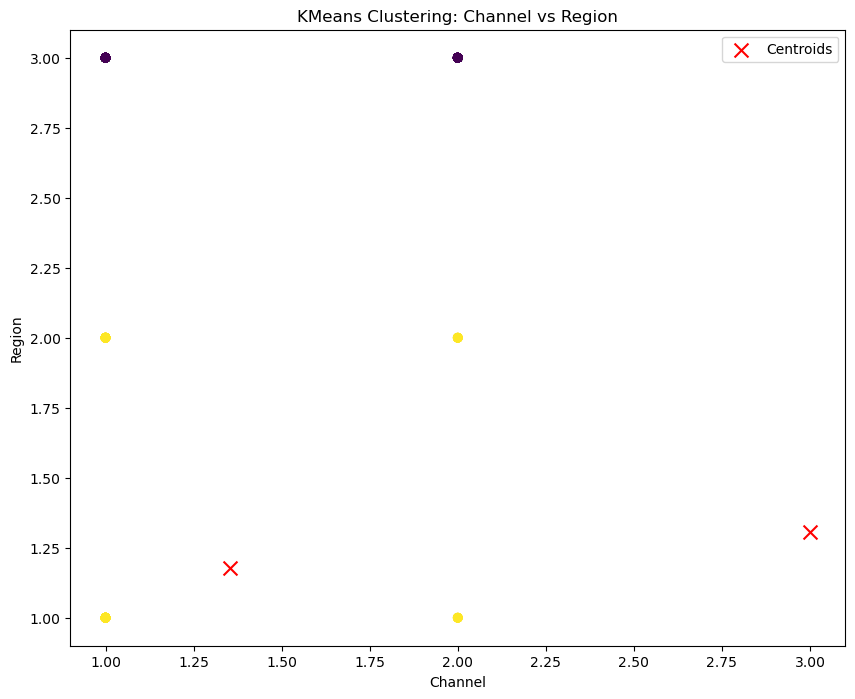

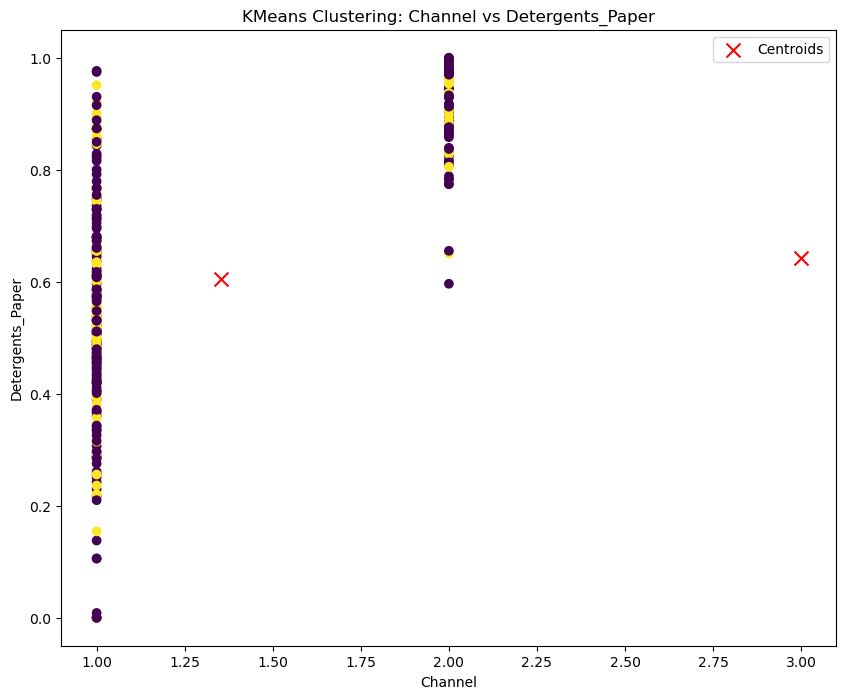

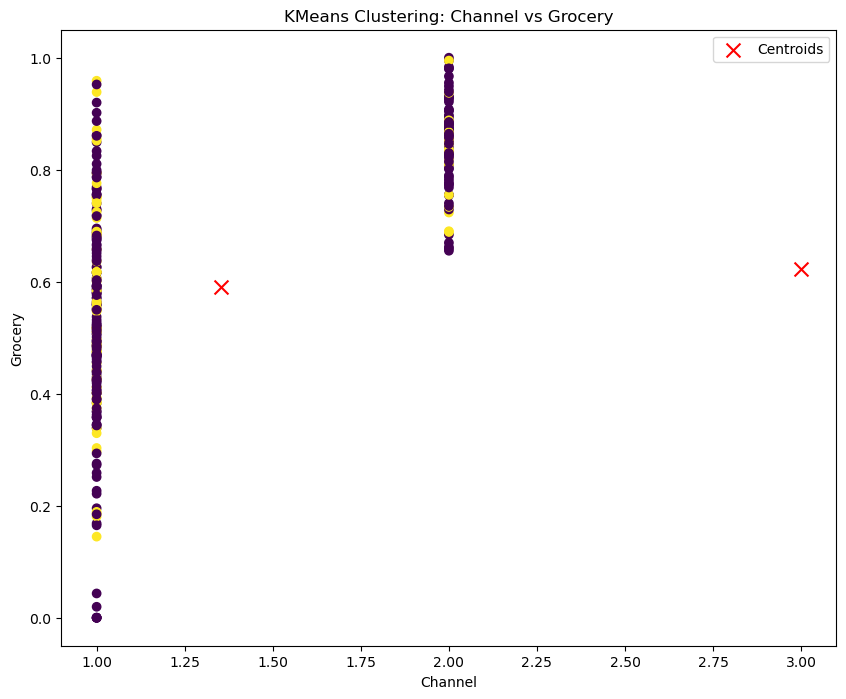

In [1635]:
# Define the variables for the scatter plots
variables = ['Region', 'Detergents_Paper', 'Grocery']

# Create scatter plots for each variable against 'Channel'
for var in variables:
    plt.figure(figsize=(10, 8))
    plt.scatter(X_transformed['Channel'], X_transformed[var], c=kmeans.labels_, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, variables.index(var) + 1], marker='x', c='r', s=100, label='Centroids')
    plt.xlabel('Channel')
    plt.ylabel(var)
    plt.title(f'KMeans Clustering: Channel vs {var}')
    plt.legend()
    plt.savefig('Plots/Channel vs {var} KMeans Scatterplot')
    plt.show()


## Second KMeans Model

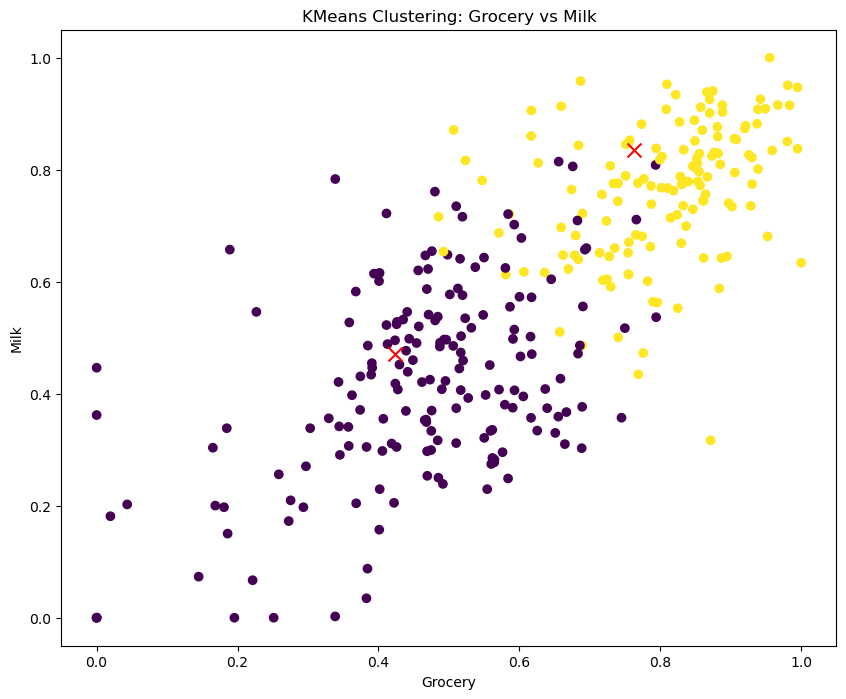

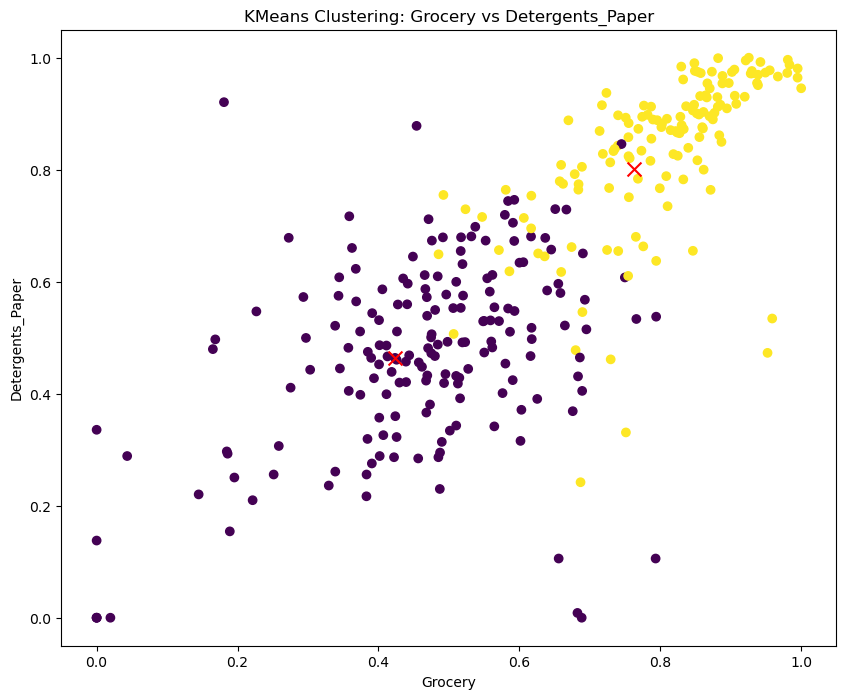

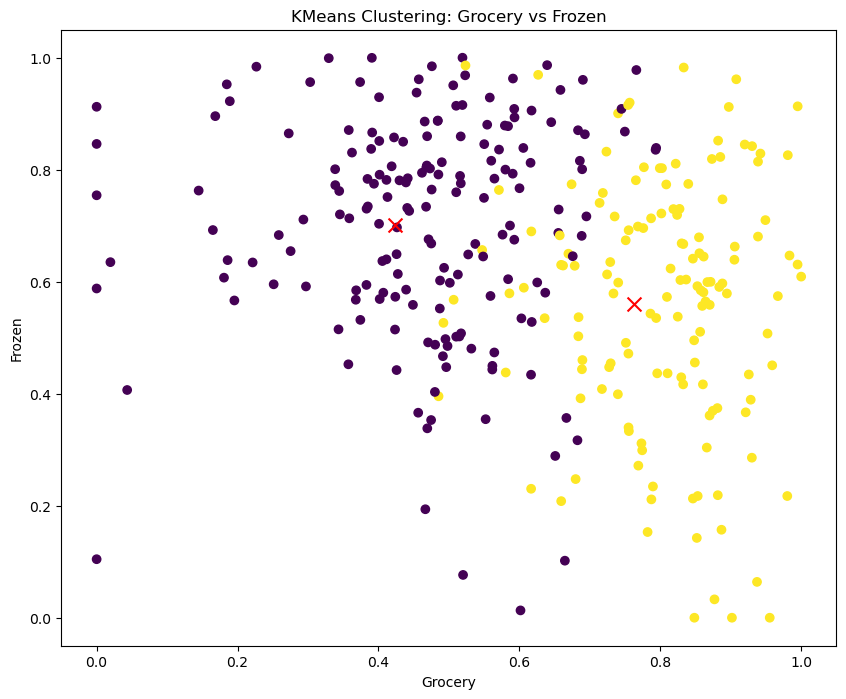

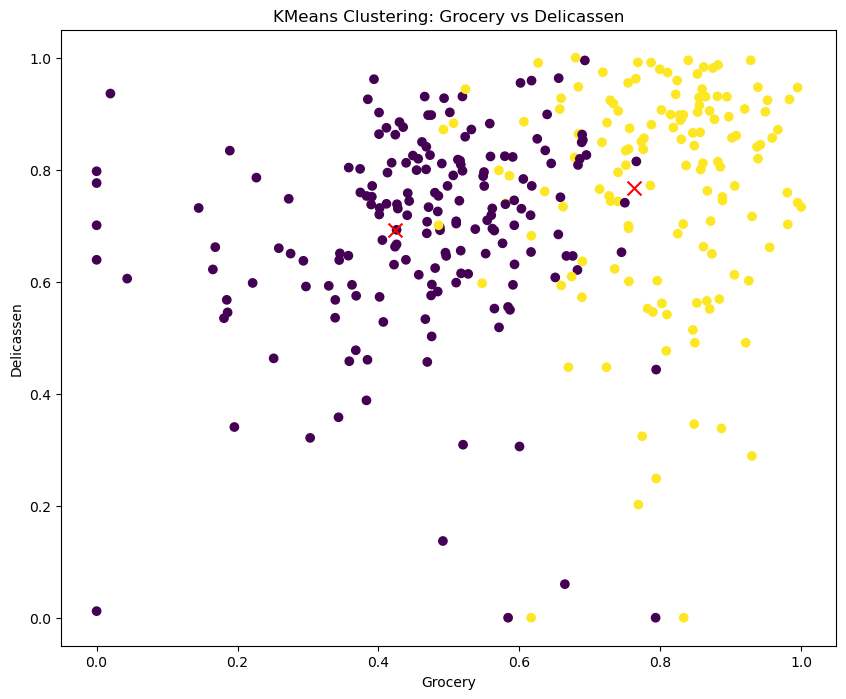

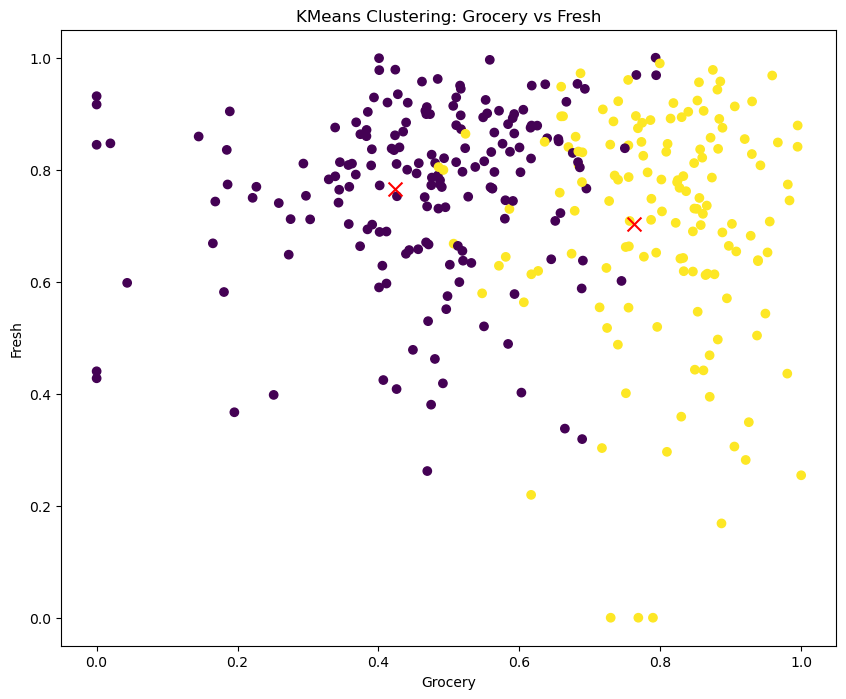

In [1636]:
df_transformed = pd.read_csv('Transformed Data.csv')

X_transformed = df_transformed[['Milk', 'Detergents_Paper', 'Grocery', 'Frozen', 'Delicassen', 'Fresh']]  

# Initialize the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the transformed data
kmeans.fit(X_transformed)

# Add the cluster labels back to the original DataFrame
df_transformed['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_centers = kmeans.cluster_centers_

# Analyze the clusters by looking at the average values of each attribute within each cluster
cluster_means = df_transformed.groupby('Cluster').mean()



# Define the variables for the scatter plots
variables = ['Milk', 'Detergents_Paper', 'Frozen', 'Delicassen', 'Fresh']

# Create scatter plots for each variable against 'Grocery'
for var in variables:
    plt.figure(figsize=(10, 8))
    plt.scatter(X_transformed['Grocery'], X_transformed[var], c=kmeans.labels_, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, variables.index(var) + 1], marker='x', c='r', s=100, label='Centroids')
    plt.xlabel('Grocery')
    plt.ylabel(var)
    plt.title(f'KMeans Clustering: Grocery vs {var}')
    plt.savefig('Plots/Grocery vs {var} KMeans Scatterplot')
    
    plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

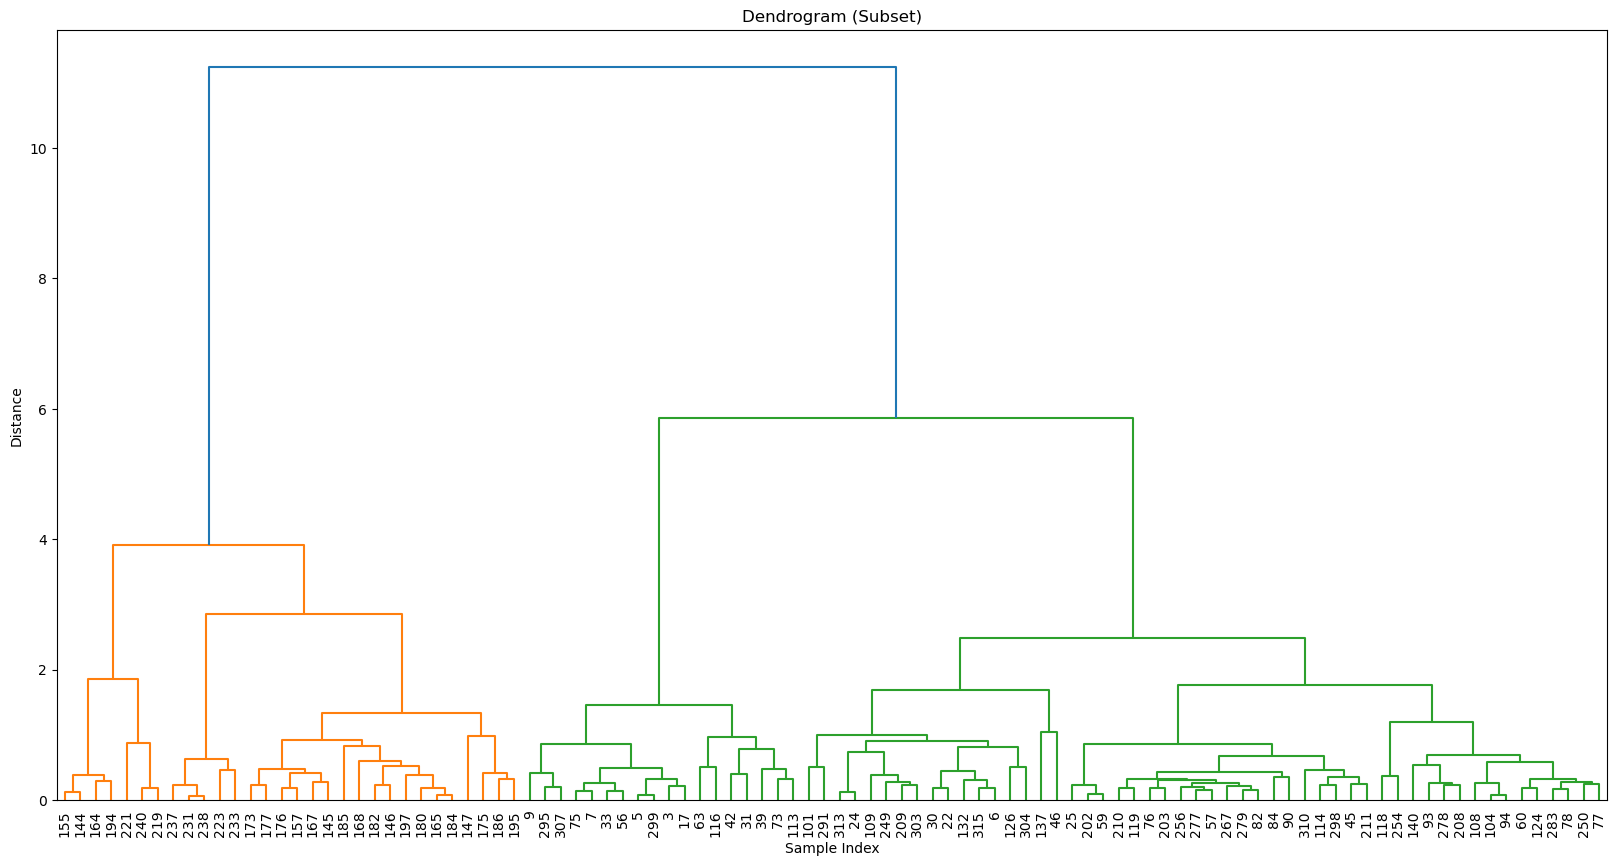

          Channel    Region     Fresh      Milk   Grocery    Frozen  \
Cluster                                                               
1        1.233333  1.266667  0.777713  0.536782  0.615142  0.699408   
2        1.257143  3.000000  0.775628  0.568139  0.611681  0.629772   

         Detergents_Paper  Delicassen  
Cluster                                
1                0.617744    0.725758  
2                0.634549    0.744572  


In [1637]:

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X_transformed = pd.read_csv('Transformed Data.csv')

# Select a subset of the data for a more readable dendrogram
subset_size = 100  # Number of samples to display in the dendrogram
X_subset = X_transformed.sample(n=subset_size, random_state=42)

# Step 2: Calculate the distance matrix and Step 3: Apply hierarchical clustering
# Using 'ward' linkage criterion
Z = linkage(X_subset, method='ward')

# Step 4: Create a dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z, labels=X_subset.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram (Subset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.savefig('Plots/Dendogram.png')

plt.show()

# Step 5: Cut the dendrogram at the optimal number of clusters
num_clusters = 2
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

# Step 6: Assign cluster labels to the original DataFrame
X_subset['Cluster'] = cluster_labels

# Analyze the clusters by looking at the average values of each attribute within each cluster
cluster_means = X_subset.groupby('Cluster').mean()
print(cluster_means)


### Hierarchical Clustering Conclusions

#### Cluster Descriptions

- **Cluster 1 and Cluster 2**: The table provides the average (mean) values for each feature (e.g., Channel, Region, Fresh, Milk, etc.) for the two clusters identified.

#### Feature Mean Values by Cluster

1. **`Channel`**:
   - **Cluster 1**: Mean value is 1.233333
   - **Cluster 2**: Mean value is 1.257143
   - **Interpretation**: Both clusters have similar Channel values, indicating they may belong to similar categories or types.

2. **`Region`**:
   - **Cluster 1**: Mean value is 1.266667
   - **Cluster 2**: Mean value is 3.000000
   - **Interpretation**: Cluster 1 primarily belongs to one region type, whereas Cluster 2 belongs to a different region type, indicating regional differentiation between the clusters.

3. **`Fresh`**:
   - **Cluster 1**: Mean value is 0.777713
   - **Cluster 2**: Mean value is 0.775628
   - **Interpretation**: Both clusters have similar average Fresh product values, suggesting that the Fresh product consumption is not a differentiating factor between these clusters.

4. **`Milk`**:
   - **Cluster 1**: Mean value is 0.536782
   - **Cluster 2**: Mean value is 0.568139
   - **Interpretation**: Both clusters have similar Milk product values, indicating similar consumption levels.

5. **`Grocery`**:
   - **Cluster 1**: Mean value is 0.615142
   - **Cluster 2**: Mean value is 0.611681
   - **Interpretation**: The average Grocery product values are almost the same for both clusters, showing no significant difference in this feature.

6. **`Frozen`**:
   - **Cluster 1**: Mean value is 0.699408
   - **Cluster 2**: Mean value is 0.629772
   - **Interpretation**: Cluster 1 has slightly higher average Frozen product values compared to Cluster 2.

7. **`Detergents_Paper`**:
   - **Cluster 1**: Mean value is 0.617744
   - **Cluster 2**: Mean value is 0.634549
   - **Interpretation**: Both clusters have similar average Detergents_Paper values, showing a minimal difference.

8. **`Delicassen`**:
   - **Cluster 1**: Mean value is 0.725758
   - **Cluster 2**: Mean value is 0.744572
   - **Interpretation**: Both clusters have similar average Delicassen values, indicating little difference in this feature.

#### Overall Interpretation

- **Similarities**: Both clusters are very similar across most features, with slight differences in `Frozen`, `Detergents_Paper`, and `Delicassen` values.
- **Key Differentiator**: The most notable difference is in the `Region` feature, where Cluster 2 has a mean value of 3.000000 compared to Cluster 1's 1.266667. This suggests that the primary differentiator between the two clusters is their regional distribution.

#### Conclusion

The hierarchical clustering output shows two clusters with very similar consumption patterns across various product categories (`Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, and `Delicassen`). The primary distinguishing feature between the two clusters is the Region, indicating that regional factors play a significant role in differentiating these clusters. The slight variations in other features may also contribute to the differentiation but to a lesser extent.


# Part IV - Principal Component Analysis (PCA)

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Principal Component Analysis (PCA) 

Explained Variance Ratio for Component 1: 0.5670
Explained Variance Ratio for Component 2: 0.2570
Explained Variance Ratio for Component 3: 0.0576
Explained Variance Ratio for Component 4: 0.0457
Explained Variance Ratio for Component 5: 0.0271
Explained Variance Ratio for Component 6: 0.0203
Explained Variance Ratio for Component 7: 0.0161
Explained Variance Ratio for Component 8: 0.0091


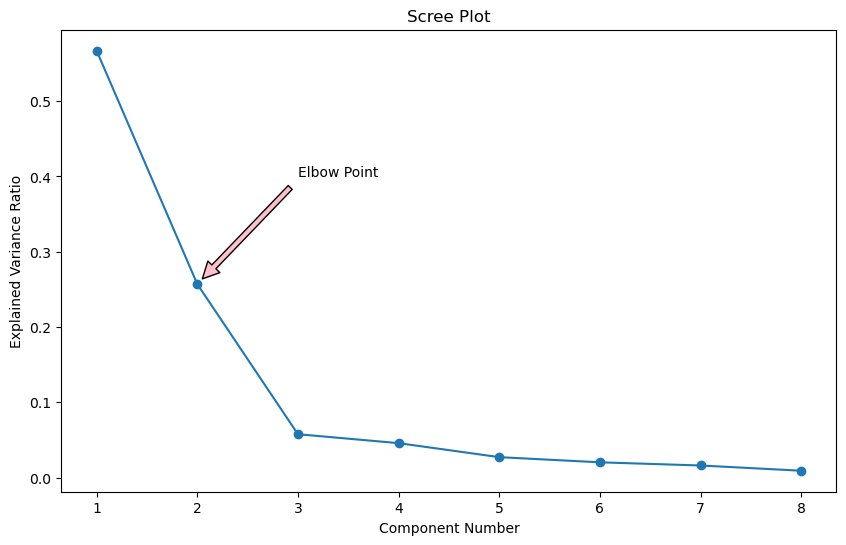

In [1638]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_transformed = pd.read_csv('Transformed Data.csv')

X = df_transformed.values

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Access explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio for each component
for i, evr in enumerate(explained_variance_ratio, start=1):
    print(f"Explained Variance Ratio for Component {i}: {evr:.4f}")



# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Highlight the elbow point
plt.annotate('Elbow Point', xy=(2, 0.2570), xytext=(3, 0.4),
             arrowprops=dict(facecolor='pink', shrink=0.05))

plt.savefig('Plots/Elbow Point with PCA.png')

plt.show()



In [1639]:
# Get the loadings for the first two components
component_loadings = pca.components_[:2]

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(component_loadings.T, columns=['PC1', 'PC2'], index=df_transformed.columns)

# Display the loadings for the first two components
print(loadings_df)

                       PC1       PC2
Channel          -0.148913  0.779329
Region           -0.983253 -0.179553
Fresh             0.015296 -0.038305
Milk             -0.056163  0.314834
Grocery          -0.052049  0.330382
Frozen            0.042395 -0.093860
Detergents_Paper -0.054056  0.369964
Delicassen       -0.014899  0.070593


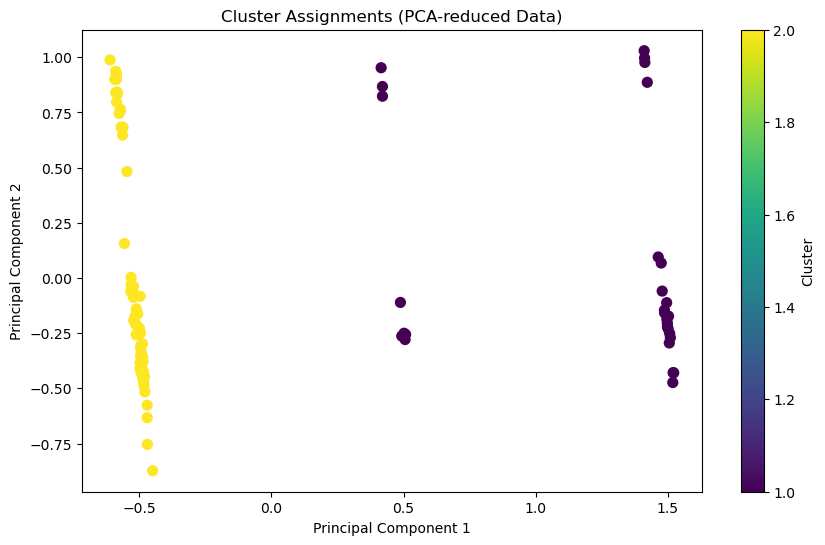

In [1640]:
# Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset.drop('Cluster', axis=1))

# Scatter plot of PCA-reduced data colored by cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_subset['Cluster'], cmap='viridis', s=50)
plt.title('Cluster Assignments (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.savefig('Plots/PCA Scatterplot.png')

plt.show()

### Conclusion of PCA

* The optimal number of clusters is 2 as the elbow point is located at component number 2. 
* Loadings interpretation: 
    - in PC1, the `Region` variable has a very high negative loading, indicating that it strongly influences the direction of PC1. 
    - Similarly, in PC2, `Channel`, `Detergents_Paper` and `Grocery` have relatively high positive loadings, indicating a strong positive relationship with PC2.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. The dataset did not have any missing values or discrepancies in terms of data types. However, it had a lot of outliers that had to be processed in order to reduce the skewness of the data (it was skewed to the right). 


2.  The total of 2 clusters were considered optimal with the PCA analysis.

    |                   | PC1       | PC2      |
    |-------------------|-----------|----------|
    | Channel           | -0.148913 | 0.779329 |
    | Region            | -0.983253 | -0.179553|
    | Fresh             | 0.015296  | -0.038305|
    | Milk              | -0.056163 | 0.314834 |
    | Grocery           | -0.052049 | 0.330382 |
    | Frozen            | 0.042395  | -0.093860|
    | Detergents_Paper  | -0.054056 | 0.369964 |
    | Delicassen        | -0.014899 | 0.070593 |

    Being `Region` and `Channel` the most influential columns for PC1 and PC2, respectively. 

    Other important variables with a positive influential loading for PC2 are the `Milk`, `Grocery` and `Detergents_Paper`. 


3. The hierarchical clustering showed two clusters with very similar consumption patterns across various product categories (`Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, and `Delicassen`). The primary distinguishing feature between the two clusters is the `Region`, indicating that regional factors play a significant role in differentiating these clusters. The slight variations in other features may also contribute to the differentiation but to a lesser extent.


4. With KMeans analysis, we tried several models taking into account the `Region`, `Channel`, and all other columns like `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, and `Delicassen`. 


    - There is a clear cluster formed for `Region` (1: Oporto, 2: Lisbon, 3: Other) vs `Grocery`, and vs `Detergents_Paper`. Meaning that there is a clear pattern in the amount of groceries that are bought in a year per region. 


    - Other KMeans models were tried without taking into consideration the `Region` or the `Channel` to see if there were any clusters formed with just the `Fresh`, `Milk`, `Frozen`, `Detergents_Paper`, and `Delicassen` columns, each plotted against the `Grocery` column.


        * In all plots it was observed 2 clear clusters (with minimal overlap of data points), and centroids separated enough to show dissimilarity between the clusters. 